Stock Market Price Prediction

In [1]:
#Import the library
import pandas as pd
import numpy as np

In [2]:
#Get the path
path='https://raw.githubusercontent.com/krishnaik06/Stock-MArket-Forecasting/master/AAPL.csv'
#Read the path
df=pd.read_csv(path)

In [3]:
#Load the data
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
#Shape of the data
df.shape

(1258, 15)

In [5]:
df1=df.reset_index()['close']

In [6]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

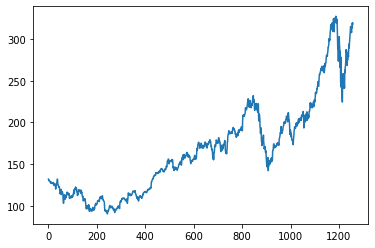

In [7]:
#Import the visualization library
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df1)

In [8]:
#LSTM is sensitive to scale of the data , So we apply MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
df1=sc.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [10]:
#Splitting the dataset in to train and test split
train=int(len(df1)*0.70)
test=len(df1)-train
train_data,test_data=df1[0:train,:],df1[train:len(df1),:1]

In [11]:
train,test

(880, 378)

In [13]:
train_data[:7]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866]])

In [14]:
test_data[:7]

array([[0.3657857 ],
       [0.36494132],
       [0.34598497],
       [0.355822  ],
       [0.35421768],
       [0.38250443],
       [0.37663599]])

In [18]:
#Convert array of values in to dataset matrix
def create_dataset(dataset,time_step=1):
  data_x,data_y=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    data_x.append(a)
    data_y.append(dataset[i+time_step,0])
  return np.array(data_x),np.array(data_y)

In [19]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [20]:
x_train.shape,y_train.shape

((779, 100), (779,))

In [21]:
x_test.shape,y_test.shape

((277, 100), (277,))

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [26]:
#Create a LSTM model 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [28]:
#Intialize the model
model=Sequential()
#Create an input layer
model.add(LSTM(units=50,return_sequences=True,input_shape=(100,1)))
#Adding second layer
model.add(LSTM(50,return_sequences=True))
#Output layer
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,verbose=1)

Epoch 1/50
25/25 [==============================] - 1s 53ms/step - loss: 0.0108 - val_loss: 0.0080
Epoch 2/50
25/25 [==============================] - 0s 16ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 3/50
25/25 [==============================] - 0s 16ms/step - loss: 7.7765e-04 - val_loss: 0.0065
Epoch 4/50
25/25 [==============================] - 0s 16ms/step - loss: 7.7411e-04 - val_loss: 0.0053
Epoch 5/50
25/25 [==============================] - 0s 15ms/step - loss: 7.0400e-04 - val_loss: 0.0062
Epoch 6/50
25/25 [==============================] - 0s 16ms/step - loss: 6.9112e-04 - val_loss: 0.0080
Epoch 7/50
25/25 [==============================] - 0s 16ms/step - loss: 6.5507e-04 - val_loss: 0.0054
Epoch 8/50
25/25 [==============================] - 0s 16ms/step - loss: 6.4931e-04 - val_loss: 0.0065
Epoch 9/50
25/25 [==============================] - 0s 16ms/step - loss: 6.0915e-04 - val_loss: 0.0076
Epoch 10/50
25/25 [==============================] - 0s 16ms/step - loss: 6.1902e

In [31]:
tf.__version__

'2.3.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [34]:

##Transformback to original form
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)


In [35]:
##Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

149.72564448404796

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

246.97171031895536

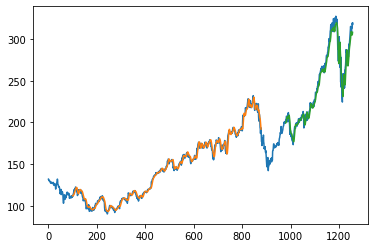

In [40]:
### Plotting 
# shift train predictions for plotting
import numpy
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(sc.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()